<a href="https://colab.research.google.com/github/sreejithpkumar/ML_MNIST_model/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
Train_ds,Test_ds = tfds.load('mnist',split=['train[80%:]','test'],shuffle_files= 'True',as_supervised= True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
len(Train_ds)

12000

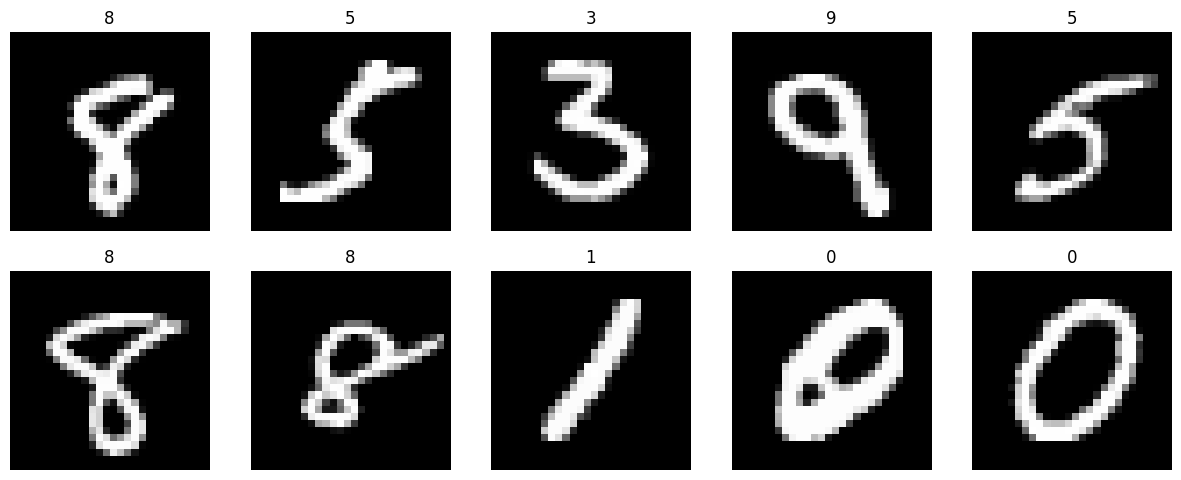

In [ ]:
dm = 10
j = 1
plt.figure(figsize= (15,15),)
for i in Train_ds.take(10):
    image,label = i
    plt.subplot(5,5,j)
    plt.imshow(image,cmap = 'gray')
    plt.title(label.numpy())
    plt.axis('off')
    j += 1

In [ ]:
Train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
x_train = []
y_train = []
for X_train , Y_train in Train_ds :
  x_train.append(X_train)
  y_train.append(Y_train)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'number of x_train is {len(x_train)}')
print(f'number of y_train is {len(y_train)}')
print(f'shape of x_train is {x_train.shape}')
print(f'shape of y_train is {y_train.shape}')

number of x_train is 12000
number of y_train is 12000
shape of x_train is (12000, 28, 28, 1)
shape of y_train is (12000,)


In [ ]:
y_hotcoded = tf.keras.utils.to_categorical(y_train,num_classes = 10)

In [ ]:
x_test = []
y_test = []
for X_test , Y_test in Test_ds :
  x_test.append(X_test)
  y_test.append(Y_test)

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(f'number of x_test is {len(x_test)}')
print(f'number of y_test is {len(y_test)}')
print(f'shape of x_test is {x_test.shape}')
print(f'shape of y_test is {y_test.shape}')

number of x_test is 10000
number of y_test is 10000
shape of x_test is (10000, 28, 28, 1)
shape of y_test is (10000,)


In [ ]:
scalar = tf.keras.layers.Normalization(axis = -1)
x_train = scalar(x_train)
x_test  = scalar(x_test)

In [ ]:
model = tf.keras.Sequential([
               tf.keras.layers.Flatten(),
               tf.keras.layers.Dense(128, activation= 'relu',kernel_regularizer=tf.keras.regularizers.L2(0.01),input_shape = (28, 28, 1))  ,
               tf.keras.layers.Dense(64, activation= 'relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))  ,
               tf.keras.layers.Dense(15, activation= 'relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))  ,
               tf.keras.layers.Dense(10)

])

In [ ]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),metrics=['accuracy',])

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test) , epochs = 100 )

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 5.0724 - accuracy: 0.1821 - val_loss: 4.1381 - val_accuracy: 0.2217
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 3.6952 - accuracy: 0.3133 - val_loss: 3.3575 - val_accuracy: 0.3581
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 3.1867 - accuracy: 0.3687 - val_loss: 2.9711 - val_accuracy: 0.3836
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.7665 - accuracy: 0.3943 - val_loss: 2.5284 - val_accuracy: 0.4492
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.0487 - accuracy: 0.5792 - val_loss: 1.6330 - val_accuracy: 0.7724
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 1.3565 - accuracy: 0.8261 - val_loss: 1.1309 - val_accuracy: 0.8928
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 0.9605 - accuracy: 0.9082 - val_loss: 1.0081 - val_accuracy: 0.899

In [ ]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pr = []
for i in range(len(y_predicted)):
  y_pr.append(y_predicted[i].argmax())

In [ ]:
def test_accuracy(yt,yp):
  flag = 0
  for i in range(len(yt)):
    if yt[i] == yp[i] : flag+= 1
  error_in_perc = ( flag / len(yt)  )
  return error_in_perc


In [ ]:
test_accuracy(y_test,y_pr)

0.942

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

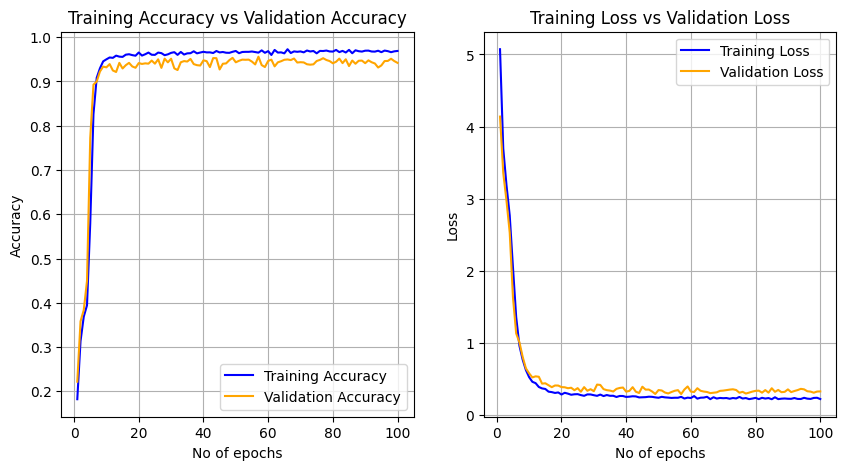

In [ ]:
epochs = range(1,101,1)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(epochs,acc,label = 'Training Accuracy',c= 'b')
plt.plot(epochs,val_acc,label = 'Validation Accuracy',c= 'orange')
plt.xlabel('No of epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.grid('on')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs,loss,label = 'Training Loss',c= 'b')
plt.plot(epochs,val_loss,label = 'Validation Loss',c= 'orange')
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.grid('on')
plt.legend()